# **Part 2 - Machine Learning** #

### University of Warwick

##### MA9070: Simulation and Machine Learning

*By Seb Murphy (u5586152)*

---
---

## *Introduction*

In the realm of machine learning, predicting credit risk stands out as a prominent application with substantial real-world implications. In this part of the project, we focus on the utilisation of machine learning classifiers to predict credit card approval, leveraging the Australian Credit Approval Dataset. 

The objective of this report is to train, test, and evaluate the performance of various classifiers in predicting credit card approval. The dataset, with categorical values replaced by numerical ones and missing values addressed through imputation, comprises 690 examples. The credit card approval information, encoded as 0 for "not approved" and +1 for "approved," serves as the label vector (y), while the remaining columns represent the features (the design the matrix X).
Throughout the report, the scikit-learn library will be employed for all machine learning tasks, and tools such as Pandas and seaborn will facilitate data manipulation, inspection, and visualization.



---

## *Read and Summarise Dataset*

Utilizing Pandas, the dataset will be read and evaluated to ensure its coherence. We will use descriptive statistics and visualisations using Pandas and seaborn to provide a comprehensive summary of the Australian Credit Approval Dataset, shown below.

In [1]:
# Import Relavent Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree

   x0     x1     x2  x3  x4  x5     x6  x7  x8  x9  x10  x11  x12   x13  y
0   1  22.08  11.46   2   4   4  1.585   0   0   0    1    2  100  1213  0
1   0  22.67   7.00   2   8   4  0.165   0   0   0    0    2  160     1  0
2   0  29.58   1.75   1   4   4  1.250   0   0   0    1    2  280     1  0
3   0  21.67  11.50   1   5   3  0.000   1   1  11    1    2    0     1  1
4   1  20.17   8.17   2   6   4  1.960   1   1  14    0    2   60   159  1
               x0          x1          x2          x3          x4          x5  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261   31.568203    4.758725    1.766667    7.372464    4.692754   
std      0.467482   11.853273    4.978163    0.430063    3.683265    1.992316   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.625000    2.750000    2.000000    8.00000

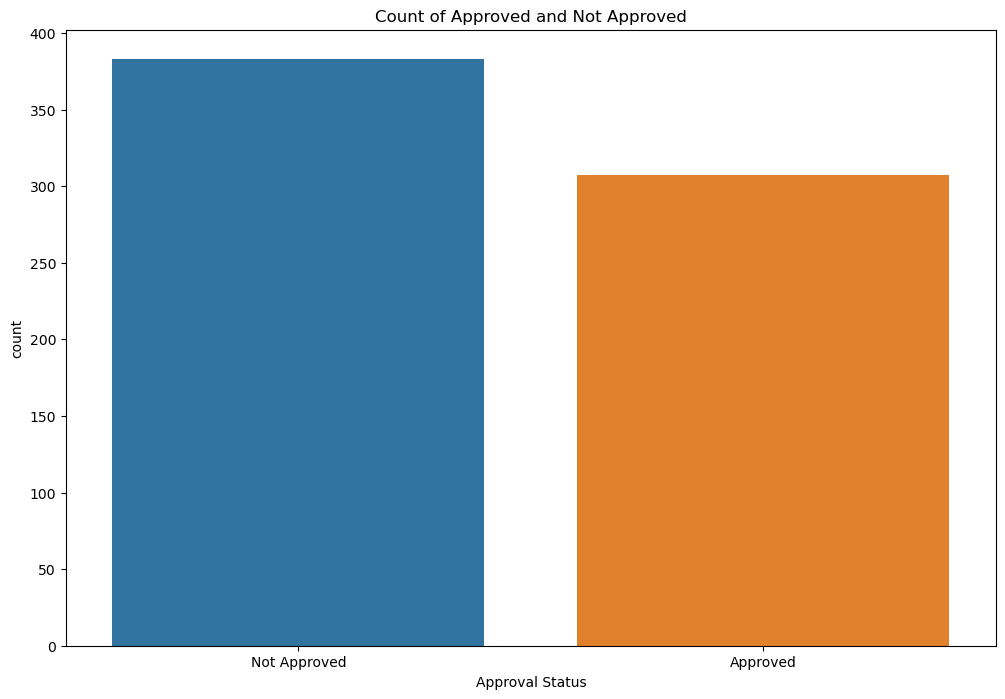

In [2]:
# Reading and summarising the Australian Credit Approval Dataset

# Load the dataset
file_path = 'C:/Users/sebam/OneDrive/Documents/Uni/Masters - Warwick/MA9070 - Simulation and ML/Project/Code/australian.csv'
data = pd.read_csv(file_path)

# Summary statitsics of the data
print(data.head())
print(data.describe())

# Rename the label column for better clarity
data['Approval Status'] = data['y'].map({0: 'Not Approved', 1: 'Approved'})

# Show a count plot of the number of approved and not approved
plt.figure(figsize=(12, 8))
sns.countplot(x='Approval Status', data=data, order=['Not Approved','Approved'])
plt.title('Count of Approved and Not Approved')
plt.show()

Here the .describe() method in Pandas was used to generate descriptive statistics of a the Australian Credit Approval Dataset, by providing a summary various statistical measures, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum. This information aids in understanding the distribution and characteristics of each feature in the dataset. As can be seen, each feature as 690 observations as expected, x13 has the highest mean and standard deviation, whereas x8 has the smallest mean. 

The sns.countplot was also employed to plot the Approval status, allowing for the visualisation of the distribution of approved and not approved credit card applications. Understanding the distribution of approved and not approved instances is crucial for assessing the performance of machine learning models. A well-balanced dataset ensures that the model is not biased toward predicting the majority class.


---

## *Run Cross Validation Score of VC classifier with default parameters*

Firstly, the design matrix (X) and label vector (y) will be extracted, followed by a train-test split and appropriate data scaling. A sanity check of the training data will then be conducted by running a cross-validation score of the Support Vector Classifier (SVC) with default parameters, offering a baseline performance measure. The score is as follows: 

In [3]:
# Extracting Design matrix and label vector and then scaling the data after a train-test split is conducted

# Get design matrix and vector of labels
X = data.iloc[:, 0:14]
y = data['y']

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Running Cross Validation

# Create an SVC with default parameters
svc_default = svm.SVC()

# Perform cross-validation on the training data
cv_scores_default = cross_val_score(svc_default, X_train_scaled, y_train, cv=5)

# Report the mean cross-validation score
mean_cv_score_default = cv_scores_default.mean()
print("Mean Cross-Validation Score (Default SVC):", mean_cv_score_default)

Mean Cross-Validation Score (Default SVC): 0.8605077805077805


---

## *Tuning Hyperparameters for linear and RDF kernels*

In this section we will tune the hyperparameters for the linear and radial basis function (rbf) kernels of the SVC classifies. Regularisation parameter (C) for the linear kernel and both C and the scale parameter (gamma) for the rbf kernel will be optimised based on mean cross-validation scores.

In [5]:
# Function to tune hyperparameter for linear kernel
def linear_tune(C_values_linear, X_train_scaled, y_train, svc_linear):
                
    # Lists to store results
    score_mean_linear_list = []
    score_std_linear_list = []
                
    # Tuning C through cross-validation scores
    for C_val in C_values_linear:
        svc_linear.C = C_val
        scores = cross_val_score(svc_linear, X_train_scaled, y_train)
        score_mean_linear_list.append(scores.mean())
        score_std_linear_list.append(scores.std())
                
    return score_mean_linear_list, score_std_linear_list

In [6]:
# Function to tune hyperparameter for RBF kernel
def rbf_tune(C_values_linear, X_train_scaled, y_train, svc_rbf):
    
    # Lists to store results
    scores_rbf_list = []
    
    # Tuning C and gamma through cross-validation scores
    for C_val in C_values_rbf:
        for gamma_val in gamma_values_rbf:
            svc_rbf.C = C_val
            svc_rbf.gamma = gamma_val
            scores = cross_val_score(svc_rbf, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
            mean_score = np.mean(scores)
            scores_rbf_list.append((C_val, gamma_val, mean_score))
    
    return scores_rbf_list

In [7]:
# Tuning Hyperparemters for the linear and RBF kernal

# Define hyperparameter values to be tested
C_values_linear_1 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_values_rbf = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values_rbf = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create SVC with linear kernel
svc_linear = svm.SVC(kernel='linear')

# Create SVC with RBF kernel
svc_rbf = svm.SVC(kernel='rbf')

# Tuning Hyperparameters
score_mean_linear, score_std_linear = linear_tune(C_values_linear_1, X_train_scaled, y_train, svc_linear)
scores_rbf = rbf_tune(C_values_rbf, X_train_scaled, y_train, svc_rbf)

We begin the hyperparameter tuning process with an initial exploration of a relatively wide range of values for the regularisation parameter (C) in the linear kernel i.e., C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]. The plot below shows the mean cross-validation scores across this range of C values. This plot serves as an overview of how the model's performance varies with different regularisation parameter values.

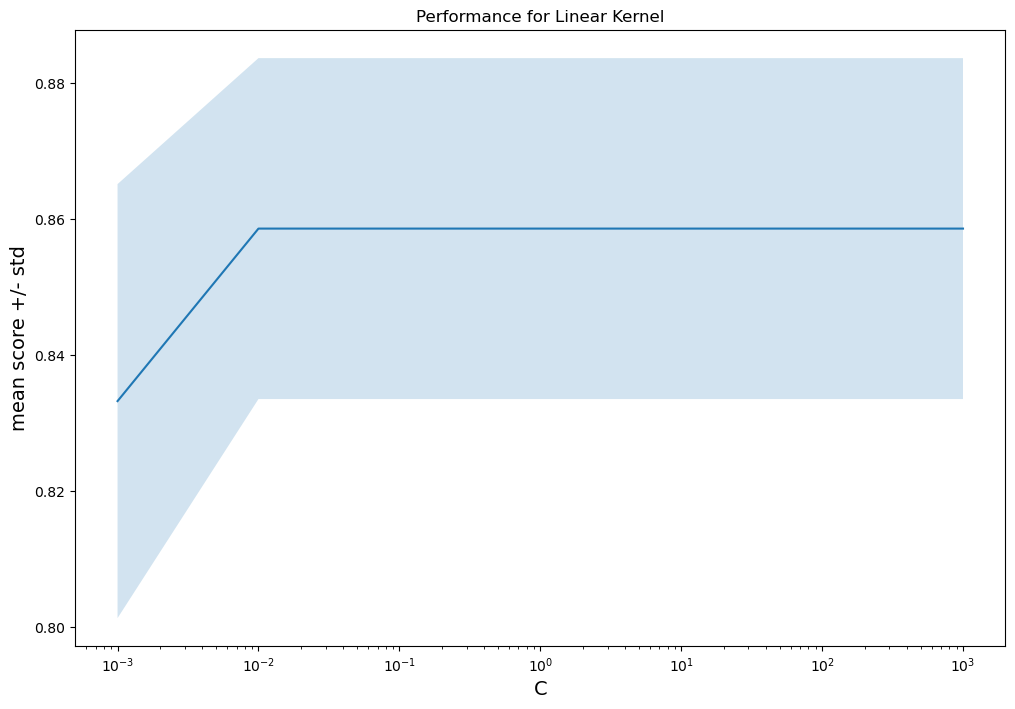

In [8]:
# Visualsing the Linear Kernal

# Convert the list of arrays to a numpy array for easier manipulation
score_mean_linear = np.array(score_mean_linear)
score_std_linear = np.array(score_std_linear)

#scores_rbf = np.array(scores_rbf).reshape(len(C_values_rbf), len(gamma_values_rbf))

# Plot results for linear kernel
plt.figure(figsize=(12, 8))
plt.semilogx(C_values_linear_1, score_mean_linear)
plt.fill_between(C_values_linear_1, score_mean_linear - score_std_linear, score_mean_linear + score_std_linear, alpha=0.2)
plt.xlabel("C", fontsize="14")
plt.ylabel("mean score +/- std", fontsize="14")
plt.title('Performance for Linear Kernel')
plt.show()

The initial plot indicates a general trend, but the range of C values is too broad to precisely identify the optimal C value. As can be seen there is a big increase in the mean score between 0.001 and 0.01, and then it is constant. Therefore, to obtain a more accurate estimate of the optimal C, a second round of hyperparameter tuning is conducted. This time, the range of C values is condensed to focus on the region where the initial plot suggested improved model performance, i.e., between 0.001 and 0.01. The C values chosen were [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]. 

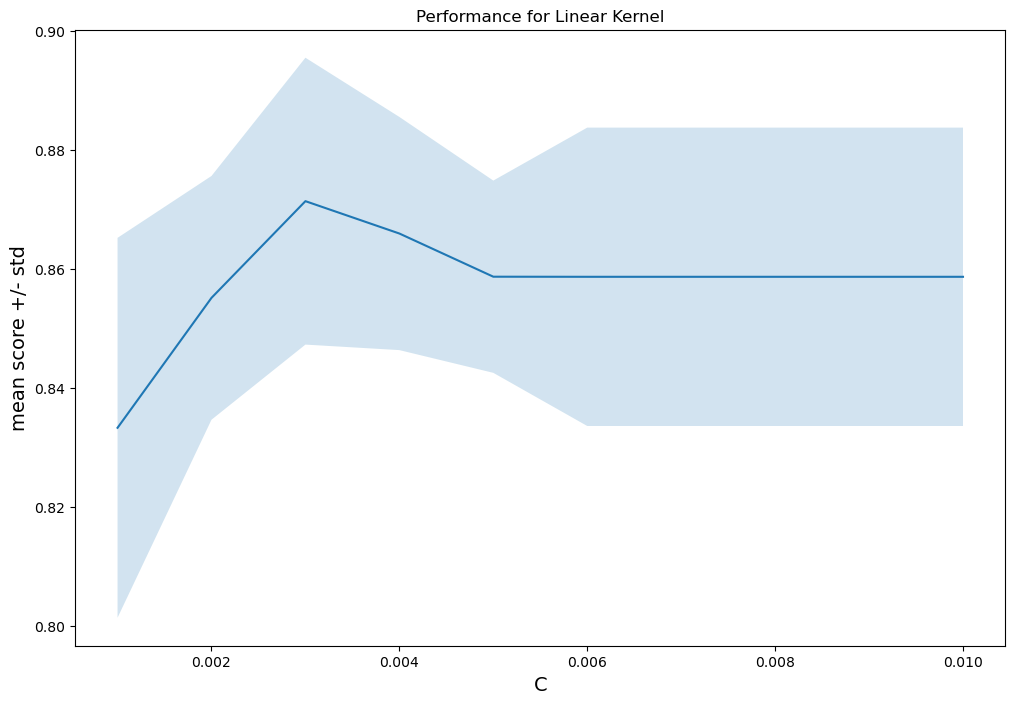


Best Hyperparameters (Linear): 0.003


In [9]:
# Visualsing the Linear Kernal over smaller range

# Tune hyperparameters for the linear Kernal over smaller range to find the optimal C
C_values_linear_2 = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
score_mean_linear, score_std_linear = linear_tune(C_values_linear_2, X_train_scaled, y_train, svc_linear)

# Convert the list of arrays to a numpy array for easier manipulation
score_mean_linear = np.array(score_mean_linear)
score_std_linear = np.array(score_std_linear)

# Plot results for linear kernel
plt.figure(figsize=(12, 8))
plt.plot(C_values_linear_2, score_mean_linear)
plt.fill_between(C_values_linear_2, score_mean_linear - score_std_linear, score_mean_linear + score_std_linear, alpha=0.2)
plt.xlabel("C", fontsize="14")
plt.ylabel("mean score +/- std", fontsize="14")
plt.title('Performance for Linear Kernel')
plt.show()

print("\nBest Hyperparameters (Linear): 0.003")

The refined plot with a narrower range of C values provides a clearer view of the region where the mean cross-validation score improves the most. The C value that maximises the mean score occurs at C = 0.003, indicating the model's optimal performance. Hence, the best hyperparameter choice for the linear kernel is C = 0.003. 

To explore the best choice for the RBF kernel, we visualise the performance of the C and gamma hyperparameters for the mean cross-validations score over a range of C values.  We consider the 3D surface plot, heatmaps, and filled contour plots, with C = [0.001, 0.003, 0.01, 0.1, 1, 10, 100, 1000] and gamma = [0.001, 0.003, 0.01, 0.1, 1, 10, 100, 1000].

The 3D surface plot illustrates the relationship between the regularisation parameter (C) and the scale parameter (gamma), and the mean cross-validation score. It provides a holistic view of how changes in both hyperparameters impact the model's performance.

The heatmap is created to represent the mean cross-validation scores. The x-axis and y-axis of the heatmap correspond to the values of the hyperparameters (C and gamma), and the colour intensity indicates the performance.

The filled contour plot is generated to further emphasise regions of high or low performance. Similar to the heatmap, the x-axis and y-axis represent the hyperparameters, and contour lines indicate areas of similar mean cross-validation scores.


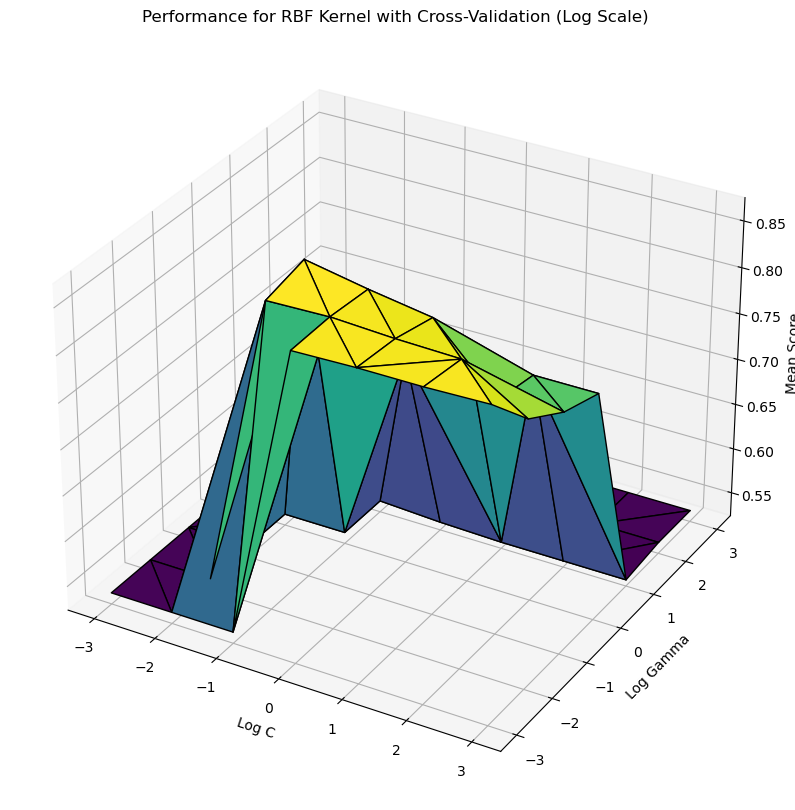

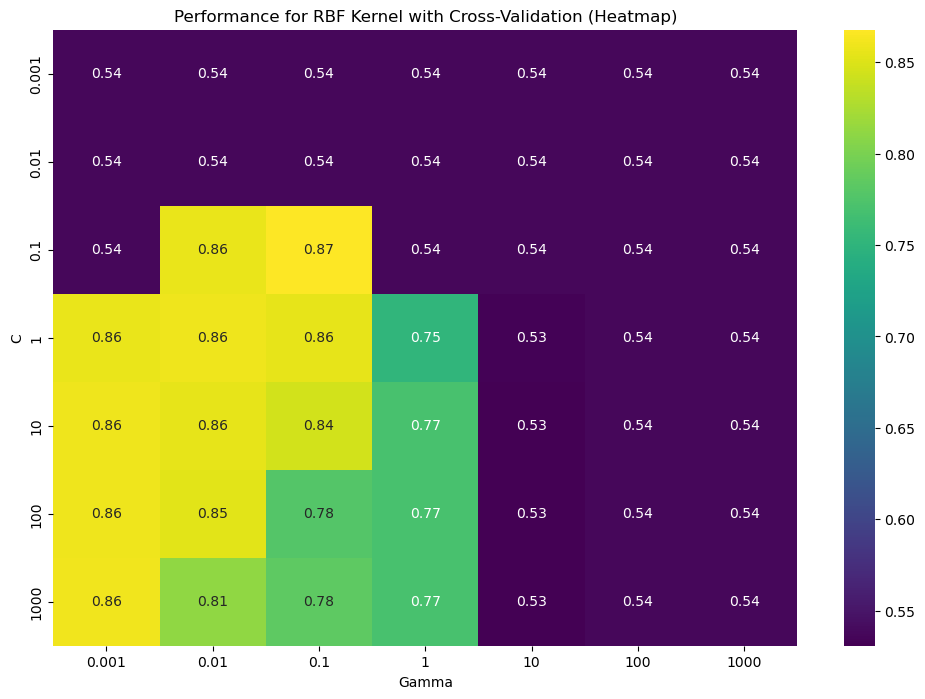

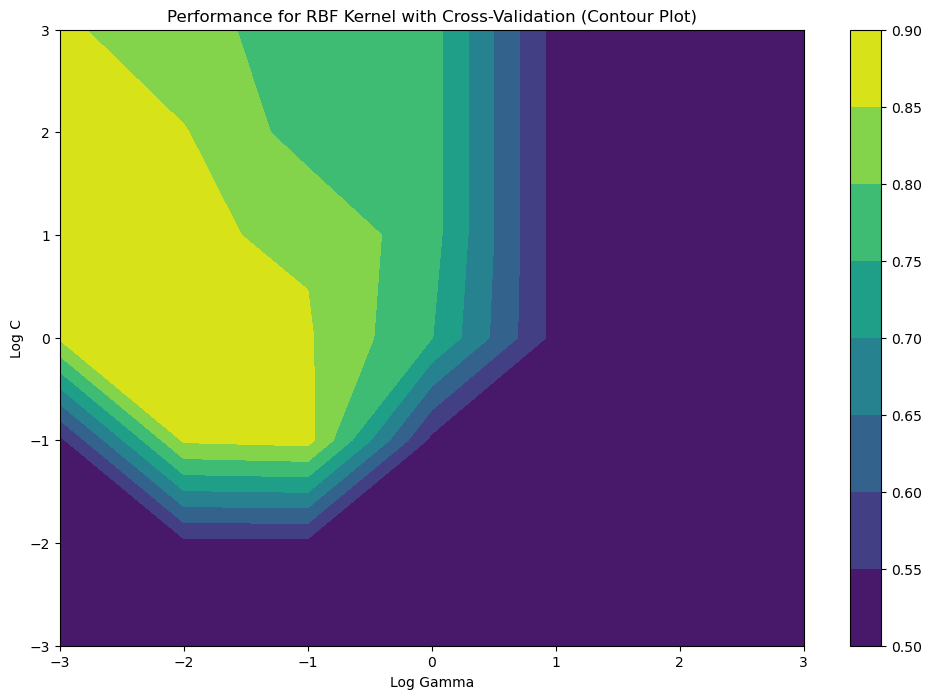


Best Hyperparameters (RBF): C = 0.1. Gamma = 0.1


In [10]:
# Visualising the RBF kernal in 3 ways

#Plot 3D surface
C_values, gamma_values, scores = zip(*scores_rbf)
log_C_values = np.log10(C_values)
log_gamma_values = np.log10(gamma_values)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(log_C_values, log_gamma_values, scores, cmap='viridis', edgecolor='k')
ax.set_xlabel('Log C')
ax.set_ylabel('Log Gamma')
ax.set_zlabel('Mean Score')
ax.set_title('Performance for RBF Kernel with Cross-Validation (Log Scale)')
plt.show()

# Create Heatmap
scores_array = np.array(scores_rbf).reshape(len(C_values_rbf), len(gamma_values_rbf), 3)
mean_scores = scores_array[:, :, 2]
plt.figure(figsize=(12, 8))
sns.heatmap(mean_scores, annot=True, cmap='viridis', xticklabels=gamma_values_rbf, yticklabels=C_values_rbf)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Performance for RBF Kernel with Cross-Validation (Heatmap)')
plt.show()

# Create a filled contour plot
plt.figure(figsize=(12, 8))
contours = plt.contourf(np.log10(gamma_values_rbf), np.log10(C_values_rbf), mean_scores, cmap='viridis')
plt.colorbar(contours)
plt.xlabel('Log Gamma')
plt.ylabel('Log C')
plt.title('Performance for RBF Kernel with Cross-Validation (Contour Plot)')
plt.show()

print("\nBest Hyperparameters (RBF): C = 0.1. Gamma = 0.1")

As can be seen from the 3 plot above, the combination of hyperparameters (C and gamma) that maximizes the mean cross-validation score occurs consistently at C = 0.1 and gamma = 0.1, hence these are chosen as the optimal parameters for the model. 

To provide confidence in these results, we utilise the grid search function from skicit learn to obtain optimal hyperparameter values for the linear and RBF kernel. As can be seen, they align with the estimated values chosen above. 

In [11]:
# Cross-checking my findings with grid search
# Define parameter grids for hyperparameter tuning
param_grid_linear = {'C': [0.001, 0.003, 0.01, 0.1, 1, 10, 100, 1000]}
param_grid_rbf = {'C': [0.001, 0.003, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.003, 0.01, 0.1, 1, 10, 100, 1000]}

# Linear kernel hyperparameter tuning
svc_linear = svm.SVC(kernel='linear')
grid_search_linear = GridSearchCV(svc_linear, param_grid_linear, cv=5)
grid_search_linear.fit(X_train_scaled, y_train)
best_params_linear = grid_search_linear.best_params_

# RBF kernel hyperparameter tuning
svc_rbf = svm.SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train_scaled, y_train)
best_params_rbf = grid_search_rbf.best_params_

# Report best hyperparameter values
print("Best Hyperparameters (Linear):", best_params_linear)
print("Best Hyperparameters (RBF):", best_params_rbf)

Best Hyperparameters (Linear): {'C': 0.003}
Best Hyperparameters (RBF): {'C': 0.1, 'gamma': 0.1}


In addition to the crucial hyperparameters such as C and gamma there are other parameters that can significantly impact the model's performance. One such parameter is the kernel coefficient (coef0), which influences the independent term in the kernel function, thereby affecting the shape of the decision boundary. Testing different values for coef0 becomes particularly relevant when a non-linear decision boundary is suspected. For the polynomial kernel, the degree parameter (degree) plays a crucial role, determining the degree of the polynomial kernel function. The shrinking parameter (shrinking) is another consideration, allowing the use of a shrinking heuristic to expedite training for large datasets, and it can be specified as a binary parameter (True or False). Additionally, the cache_size parameter determines the size of the kernel cache in megabytes, with larger values potentially speeding up training for datasets that fit into memory. When faced with imbalanced datasets, the class_weight parameter comes into play, enabling the assignment of different weights to different classes and proving beneficial for maintaining model accuracy. As for computing time, the shrinking parameter can be advantageous for large datasets by reducing the number of support vectors, and adjusting the cache_size may impact memory usage and computation time. 

However, the impact of these hyperparameters on computing time can vary based on the dataset. When undertaking hyperparameter tuning, striking a balance between model performance and computation time is key. For example, initiating with a coarse grid search helps identify promising regions, followed by a finer search around those values. Also, techniques like random search can also efficiently explore the hyperparameter space, ensuring a comprehensive optimisation process.


---

## *Comparing SVC Classifiers*

In order to compare the two tuned SVC classifiers with different kernels, evaluation metrics will be employed to assess and contrast their performance, such as confusion matrices. Below shows the performance for the linear and RBF kernel, by presenting the accuracy of each classifier, their confusion matrix, and their classification report, including their overall classifier score. 

Linear Kernel Performance:
-----------------------------------------
Accuracy: 0.855072463768116
Confusion Matrix:


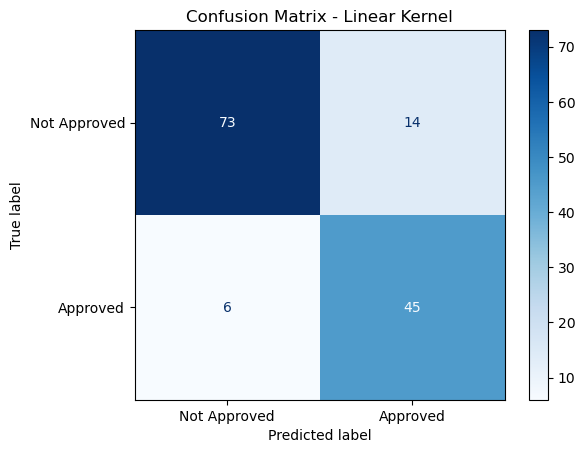

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        87
           1       0.76      0.88      0.82        51

    accuracy                           0.86       138
   macro avg       0.84      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138

The classifier score is 0.855072463768116

RBF Kernel Performance:
-----------------------------------------
Accuracy: 0.8623188405797102
Confusion Matrix:


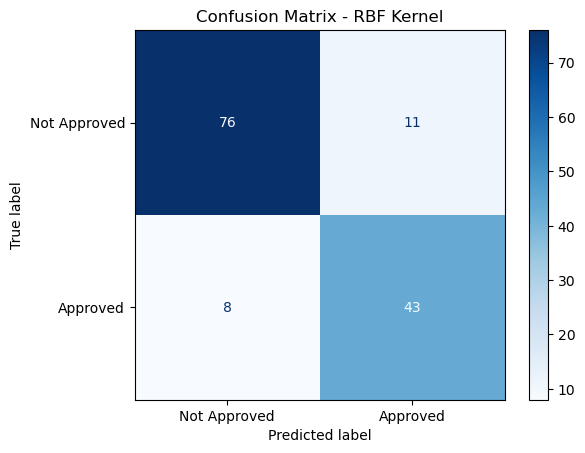

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        87
           1       0.80      0.84      0.82        51

    accuracy                           0.86       138
   macro avg       0.85      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138

The classifier score is 0.8623188405797102


In [12]:
# Compare two classifiers with confusion matrices

# Create SVC with tuned hyperparameters for linear kernel
svc_linear_tuned = svm.SVC(kernel='linear', C=0.003)  
svc_linear_tuned.fit(X_train_scaled, y_train)
y_pred_linear = svc_linear_tuned.predict(X_test_scaled)

# Evaluate linear kernel performance
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
classification_report_linear = classification_report(y_test, y_pred_linear)


# Create SVC with tuned hyperparameters for RBF kernel
svc_rbf_tuned = svm.SVC(kernel='rbf', C = 0.1, gamma = 0.1)  # Replace with the best C and gamma values for RBF kernel
svc_rbf_tuned.fit(X_train_scaled, y_train)
y_pred_rbf = svc_rbf_tuned.predict(X_test_scaled)

# Evaluate RBF kernel performance
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
classification_report_rbf = classification_report(y_test, y_pred_rbf)

# Compare the performance metrics
print("Linear Kernel Performance:")

print("-----------------------------------------")
print(f"Accuracy: {accuracy_linear}")
print("Confusion Matrix:")
disp_linear = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear,
                              display_labels = ['Not Approved', 'Approved'])
disp_linear.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Linear Kernel')
plt.show()
print("Classification Report:")
print(classification_report_linear)
print("The classifier score is", svc_linear_tuned.score(X_test_scaled, y_test))

print("\nRBF Kernel Performance:")
print("-----------------------------------------")
print(f"Accuracy: {accuracy_rbf}")
print("Confusion Matrix:")
disp_linear = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf,
                              display_labels = ['Not Approved', 'Approved'])
disp_linear.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - RBF Kernel')
plt.show()
print("Classification Report:")
print(classification_report_rbf)
print("The classifier score is", svc_rbf_tuned.score(X_test_scaled, y_test))


The comparison between the RBF and linear kernels reveals that the RBF kernel achieves higher accuracy, suggesting an overall superior correctness measure. This conclusion is further supported by the detailed insights provided by the confusion matrix, which breaks down correct and incorrect predictions, offering valuable information about the model's performance. In the context of predicting credit card approvals, precision for predicting approval (1) and recall (sensitivity) for predicting rejection (0) hold particular significance, with false positives considered more detrimental than false negatives.

Analysing the classification reports, it is evident that the RBF kernel exhibits higher precision for approval (1) with a value of 0.80 compared to the linear kernel's precision of 0.76. This implies that the RBF kernel makes fewer false positive predictions, a critical factor in credit approval scenarios. Furthermore, the RBF kernel demonstrates higher recall for rejection (0) with a value of 0.87, outperforming the linear kernel's recall of 0.84. This indicates fewer instances of incorrectly predicting rejection, reinforcing the superiority of the RBF kernel.

However, the decision between the linear and RBF kernels necessitates a consideration of model complexity. 

In [13]:
# Discuss model complexity
print("\nModel Complexity:")
print("-----------------------------------------")
print(f"Linear Kernel Coefficients: {len(svc_linear_tuned.coef_[0])}")
print(f"Number of Support Vectors (Linear): {len(svc_linear_tuned.support_)}")
print(f"Number of Support Vectors (RBF): {len(svc_rbf_tuned.support_)}")


Model Complexity:
-----------------------------------------
Linear Kernel Coefficients: 14
Number of Support Vectors (Linear): 349
Number of Support Vectors (RBF): 398


The linear kernel, being simpler, may be less prone to overfitting, particularly given the relatively small dataset. On the other hand, the RBF kernel, with its higher complexity, might capture more intricate patterns but could be more susceptible to overfitting. Thus, on this evaluation, the linear kernel may be preferred since we are dealing with a small dataset. 

Considering financial implications associated with credit approvals, precision and recall take on additional significance. False approvals (false positives) may have financial repercussions, making precision a critical metric. The RBF kernel's higher precision suggests a reduced likelihood of approving credit incorrectly, aligning with the financial objective of minimising such errors.

Ultimately, the choice between the linear and RBF kernels hinges on the specific requirements of the credit card approval task, considering the trade-offs between precision, recall, accuracy, and model complexity. It is crucial to weigh the financial implications of false approvals and rejections, keeping in mind the consequences of decisions made by the model. The trade-off between recall and precision should be carefully considered in the broader context of the problem and associated risks. It must be noted that the analysis presented here provides a preliminary understanding, and more issues need to be considered. Exploring other classifiers, taking into account the limitations of a small dataset, and addressing potential biases are essential steps in developing a robust credit approval prediction model.


---

## *Evaluating the MLP, Decision Tress and Random Forest Classifiers*

Three other classifiers from scikit-learn will be considered:
- Multilayer Perceptron (MLP),
- Decision Tree, 
- Random Forest. 

Hyperparameter tuning for the MLP classifier will be explored, while brief investigations into hyperparameters for the other classifiers will be conducted as well.


The below code shows tuning for the MLP classifier. It is a type of artificial neural network designed for supervised learning. Its strength lies in its ability to learn complex patterns from data through the training of interconnected layers of neurons. While versatile, offering flexibility in modelling various relationships, MLPs require careful tuning and can be sensitive to the choice of hyperparameters.

In the exploration of Multi-Layer Perceptron (MLP) architectures for classification, a systematic approach was undertaken. The GridSearchCV is used to perform hyperparameter tuning for the Multi-Layer Perceptron (MLP) classifier. The hyperparameter of interest is the hidden_layer_sizes, representing the number of neurons in the hidden layers. The grid search is conducted over different values for this parameter. A few examples that were used are included below, but commented out to reduce computation time. Only the final MLP is included in the code. 
The best hidden layer size is then extracted from the results, and a new MLP classifier (mlp_tuned) is trained with this optimal configuration. Finally, the model is evaluated on the test set, and the test accuracy is printed.
This process allows for the determination of the most effective number of neurons in the hidden layers, optimising the performance of the MLP classifier for the given dataset. A similar process for tuning the other hyperparameters activation and alpha was used. The optimal hyperparameters are shown below. 


In [14]:
def get_best_params(mlp_classifier, mlp_parameters):
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(mlp_classifier, mlp_parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    best_params = grid_search.best_params_

    # Train MLP with the best hyperparameters
    mlp_tuned = MLPClassifier(**best_params, max_iter=100)
    mlp_tuned.fit(X_train, y_train)

    # Evaluate the best model on the test set
    y_pred = mlp_tuned.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    return test_accuracy, best_params

In [15]:
# HyperParameter Tuning for the MLP Classifier

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Create MLP classifier
mlp_classifier = MLPClassifier(max_iter=100)

# Set a random seed for reproducibility
np.random.seed(42)



# # Define hyperparameters to be tested
# mlp_parameters_1 = {
#     'hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
#     # 'activation': ['tanh'],
#     # 'alpha': [0.01],
# }

# mlp_parameters_2 = {
#     'hidden_layer_sizes': [(50,), (60,), (70,)],
#     # 'activation': ['tanh'],
#     # 'alpha': [0.01],
# }

# mlp_parameters_3 = {
#     'hidden_layer_sizes': [(10, 10), (10, 20), (20, 10)],
#     # 'activation': ['tanh'],
#     # 'alpha': [0.01],
# }

# mlp_parameters_4 = {
#     'hidden_layer_sizes': [(40, 40), (10, 10, 10), (20, 40, 10)],
#     # 'activation': ['tanh'],
#     # 'alpha': [0.01],
# }

# print("\nTesting different hidden layer sizes for the MLP Classifier to determine optimal size")
# print("----------------------------------")

# # Evaluating mlp_parameters_1
# print("\nTesting Hidden Layer Sizes:", mlp_parameters_1)
# accuracy = get_best_params(mlp_classifier, mlp_parameters_1)
# print("Test Set Accuracy with Best Model:", accuracy)

# # Evaluating mlp_parameters_2
# print("\nTesting Hidden Layer Sizes:", mlp_parameters_2)
# accuracy = get_best_params(mlp_classifier, mlp_parameters_2)
# print("Test Set Accuracy with Best Model:", accuracy)

# # Evaluating mlp_parameters_3
# print("\nTesting Hidden Layer Sizes:", mlp_parameters_3)
# accuracy = get_best_params(mlp_classifier, mlp_parameters_3)
# print("Test Set Accuracy with Best Model:", accuracy)

# # Evaluating mlp_parameters_4
# print("\nTesting Hidden Layer Sizes:", mlp_parameters_4)
# accuracy = get_best_params(mlp_classifier, mlp_parameters_4)
# print("Test Set Accuracy with Best Model:", accuracy)


# Define optimal hyperparameters and print results
mlp_parameters_final = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,)],
    'activation': ['tanh'], 
    'alpha': [0.1],
}

print("\nOptimal Hyperparameters for the MLP Classifier")
print("----------------------------------")
accuracy = get_best_params(mlp_classifier, mlp_parameters_final)
print("Test Set Accuracy with Best Model:", accuracy)


Optimal Hyperparameters for the MLP Classifier
----------------------------------
Test Set Accuracy with Best Model: (0.8333333333333334, {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (40,)})


Hyperparameter tuning for the Decision Tree classifier is shown below. Decision trees are intuitive and interpretable models used for both classification and regression tasks. They partition the input space based on feature values, creating a tree-like structure. Decision trees are advantageous for their simplicity, ease of interpretation, and the ability to handle both numerical and categorical data. However, they may be prone to overfitting and lack the predictive power of more complex models.

We use the GridSearchCV as above, and the hyperparameter grid is strategically designed to explore variations in the criteria for splitting, the choice of splitting strategies, and maximum tree depth. To mitigate computational demands, certain hyperparameters, including minimum samples for splitting, and leaf nodes, are intentionally omitted and commented out. The optimal hyperparameters are determined, and the final evaluation entails assessing the accuracy of the tuned Decision Tree classifier on the test set, providing a comprehensive measure of its predictive capability, as shown below. 

In [16]:
# HyperParameter Tuning for the Decision Tree Classifier

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters to be tested
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [None, 5, 10, 15],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for hyperparameter tuning
dt_grid = GridSearchCV(dt_classifier, dt_parameters, cv=5, scoring = 'accuracy')
dt_grid.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_dt_params = dt_grid.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_dt_params)

# Train Decision Tree with best hyperparameters
dt_tuned = DecisionTreeClassifier(**best_dt_params)
dt_tuned.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred = dt_tuned.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Tuned Decision Tree:", test_accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
Test Set Accuracy with Tuned Decision Tree: 0.8768115942028986


The Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It inherits the interpretability of decision trees while enhancing predictive performance through aggregation. Random Forest is robust, handles high-dimensional data well, and provides feature importance measures, making it a versatile choice for a wide range of applications. Below we aim at tuning its hyperparameters. 

Similar to above the Random Forest classifier undergoes hyperparameter tuning using scikit-learn's GridSearchCV. The hyperparameter grid encompasses variations in the number of estimators and splitting criteria. Other hyperparameter’s were tested such as the maximum tree depth, minimum samples for splitting and leaf nodes, but are commented to reduce computation times. The best-performing hyperparameters are then extracted, guiding the training of a refined Random Forest classifier on the scaled training data, and the accuracy score is evaluated as shown below.

In [17]:
# HyperParameter Tuning for the Random Forest Classifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define hyperparameters to be tested
rf_parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    # 'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
}

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_classifier, rf_parameters, cv=5, scoring = 'accuracy')
rf_grid.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_rf_params)

# Train Random Forest with best hyperparameters
rf_tuned = RandomForestClassifier(**best_rf_params)
rf_tuned.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred = rf_tuned.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Tuned Decision Tree:", test_accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'n_estimators': 200}
Test Set Accuracy with Tuned Decision Tree: 0.8840579710144928


---

## *Investigating which features are most important in determining the classification*

We conclude this report with an exploration of feature importance, seeking insights into the factors driving credit card approval. Techniques such as permutation importance and visualization of Decision Tree structures will be employed for this purpose. For this section the tuned decision tree classifier will be evaluated to investigate feature importance. This is because Decision Tree classifiers are particularly well-suited for small datasets due to their inherent characteristics. Their simplicity and intuitive structure make them easy to understand, reducing the risk of overfitting commonly associated with complex models in limited data scenarios. Also, Decision Trees do not assume linearity in the underlying data, allowing them to capture complex non-linear patterns that might be challenging for linear models. Moreover, Decision Trees offer clear insights into feature importance, aiding in feature engineering and interpretability crucial for small datasets. Additionally, Decision Trees stand out as the only classifier where the tree structure can be visually plotted using the plot_tree function from scikit-learn, providing a unique advantage in model interpretation. Despite these advantages, it's essential to acknowledge that Decision Trees have limitations, such as sensitivity to noise, which can be mitigated by considering ensemble methods like Random Forests or Gradient Boosted Trees for improved predictive performance while maintaining interpretability.


By employing the permutation_importance in the skicit-learn library, the most important features are listed in order below, showing that feature x7 as the most important and x2 is the least important with the lowest score. 


In [18]:
# Investigating feature importance in the tuned decision tree classifier

# Using the tuned decision tree classifier
test_model = dt_tuned

# Calculate permutation importance
perm_importance = permutation_importance(test_model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Extract and sort feature importance scores
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Display feature importance
for idx in sorted_idx:
    print(f"{X_test.columns[idx]}: {perm_importance.importances_mean[idx]:.4f}")

x7: 0.2242
x8: 0.0558
x4: 0.0423
x5: 0.0135
x6: 0.0097
x11: 0.0094
x0: 0.0043
x12: 0.0031
x3: 0.0019
x13: 0.0000
x10: 0.0000
x9: 0.0000
x1: 0.0000
x2: -0.0031


Additionally, we ran a Decision Tree, using the plot_tree function from skicit-learn library, with a limited depth and visualized the tree structure. This provides a direct view of the features utilized for decision-making at various nodes. A shallow tree was chosen to enhance interpretability, allowing us to pinpoint the most critical features without unnecessary complexity.

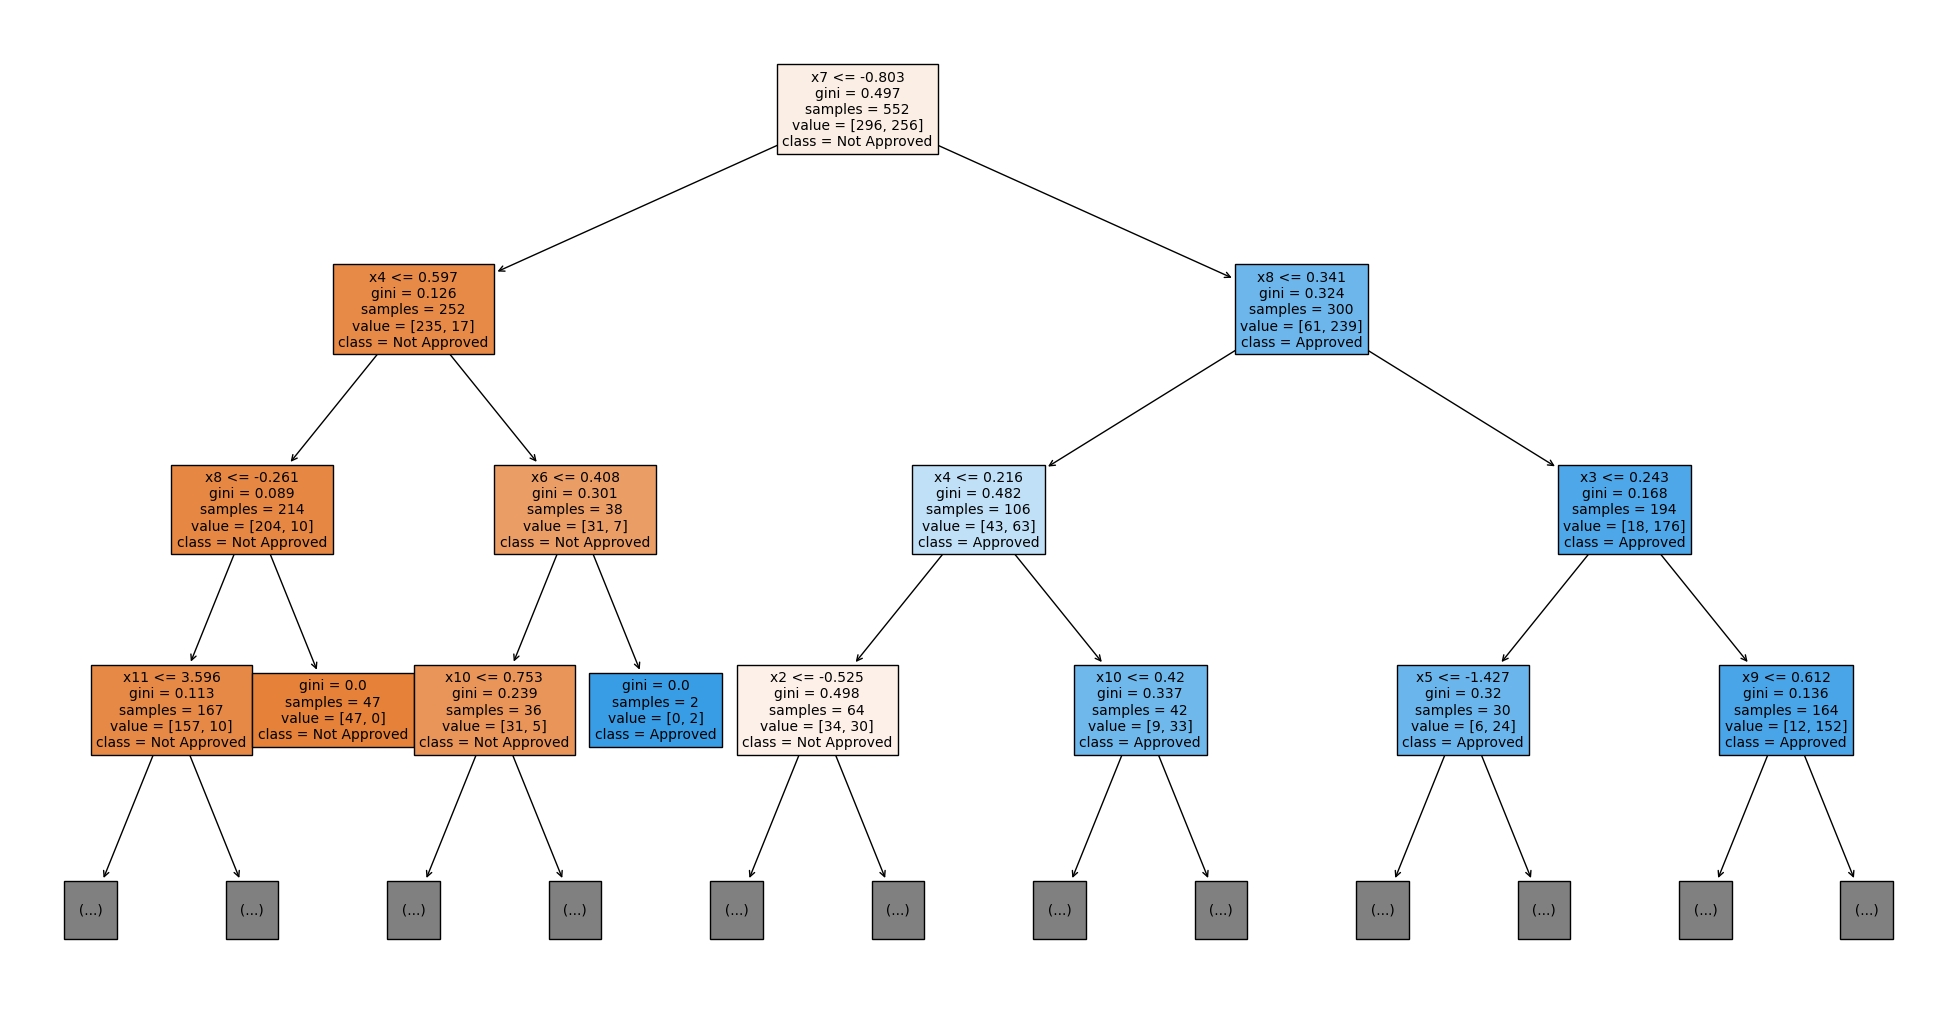

In [19]:
# Decision Tree visualisation - provides insights into feature importance by showing the splits and decisions made by the tree
feature_names_list = list(X.columns)
plt.figure(figsize=(25, 13))
plot_tree(test_model, max_depth=3, feature_names=feature_names_list, class_names=['Not Approved', 'Approved'], filled=True)
plt.show()

To further enhance our understanding, we leveraged the seaborn library to create visualisations illustrating the connection between important features and the label. This step is crucial for interpreting the relationships between specific features and the model's classification decisions. The plots below include:
- Bar plot: This clearly indicating visually the most important features for classification as given above by the permutation_importance function.
- Pair plot using seaborn: This compares the most important features e.g., x7 and x8, and the worst feature x2, clearly showing how different features compare against each other in terms of the approval status.
- Violin plot using seaborn: Two plots are shown - one for the most important feature and one the least important feature. As can be seen, for the violin plot with x7, there is two distinct datasets, one being approved and one being not approved, but this is not the case for x2. 
- Heatmap: This demonstrates visually with colours the connection between important features and the label. It can be seen that the most important feature x7 has the highest score on the heatmap (excluding the 1 representing the connection between the same variable) 


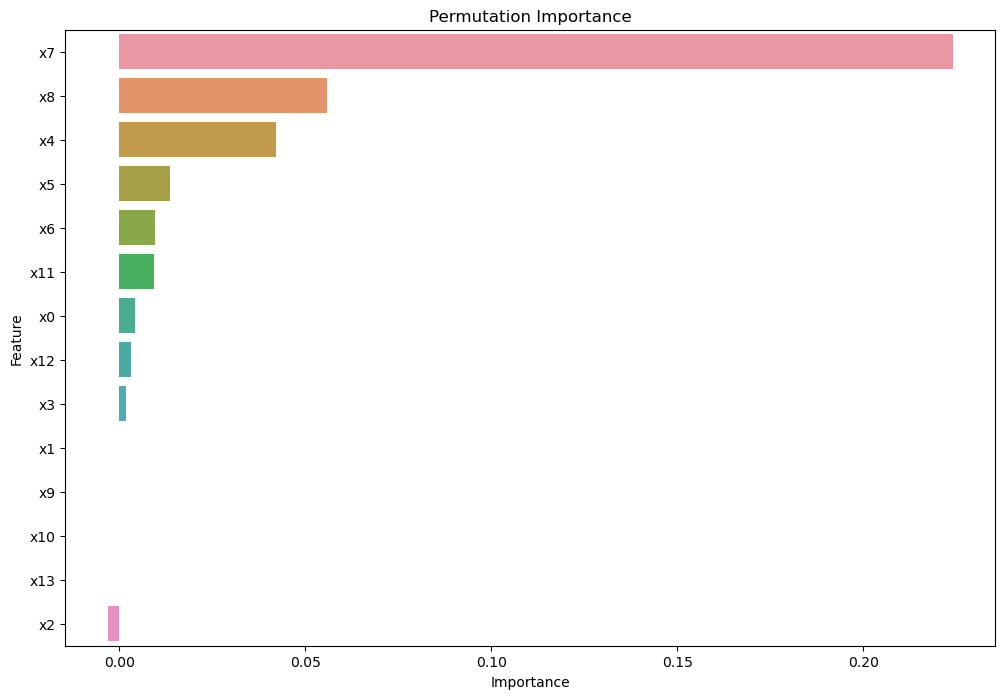

In [20]:
# Seaborn Visulisation of feature importance 

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean})
df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df)
plt.title('Permutation Importance')
plt.show()

Pairplot comparing different features in terms of Approval Status:

C:\Users\sebam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


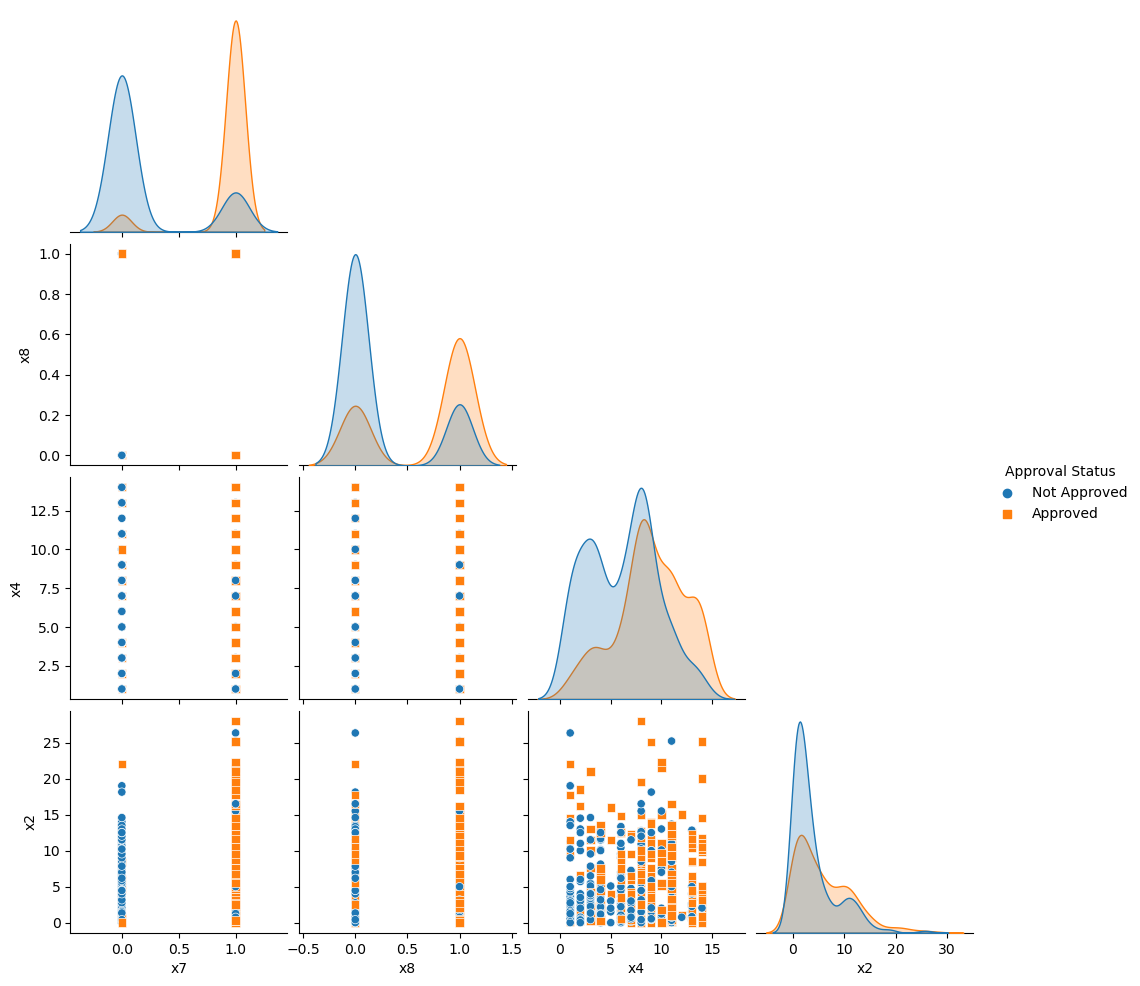

In [23]:
# Pair Plot
df_combined = pd.concat([data['x7'], data['x8'], data['x4'], data['x2'], data['Approval Status']], axis=1)
sns.pairplot(df_combined, hue='Approval Status', corner=True, markers=["o", "s"])
plt.show()

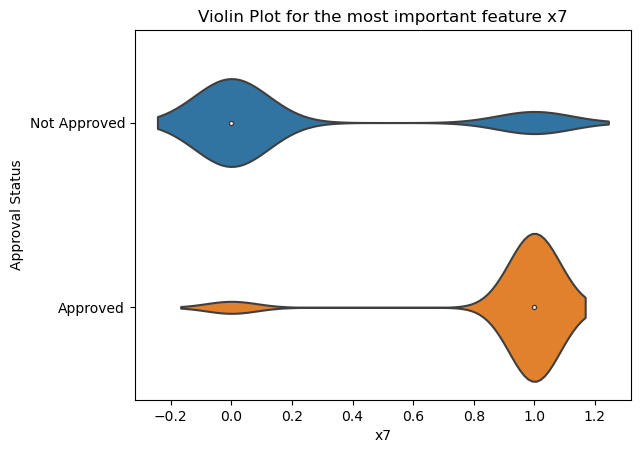

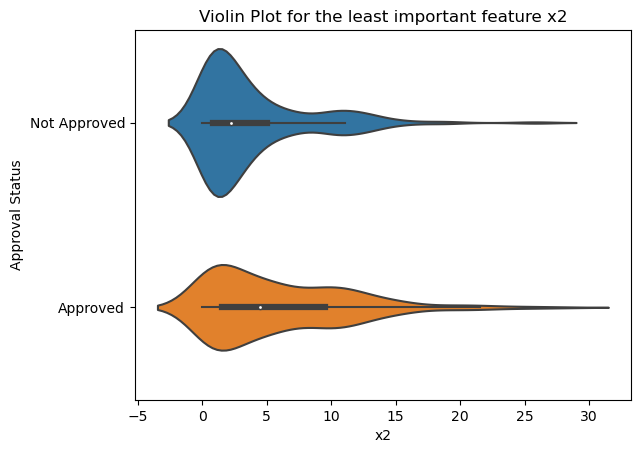

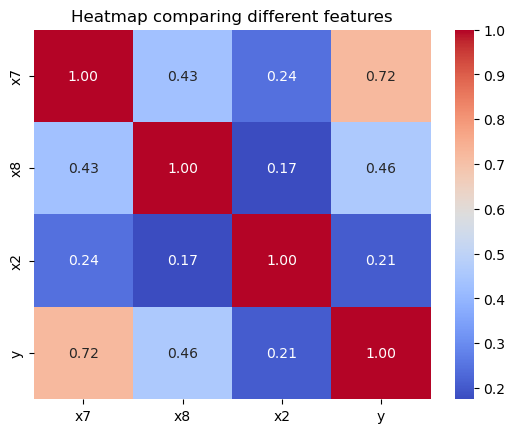

In [24]:
#Violin Plot
sns.violinplot(x='x7', y='Approval Status', data=data)
plt.title('Violin Plot for the most important feature x7')
plt.show()
sns.violinplot(x='x2', y='Approval Status', data=data)
plt.title('Violin Plot for the least important feature x2')
plt.show()

# Heatmap Plot
correlation_matrix = data[['x7'] + ['x8'] + ['x2'] + ['y']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap comparing different features')
plt.show()

The permutation importance analysis and Decision Tree visualization both highlighted certain features as pivotal in determining credit card approval. Notably, feature x7 emerged as consistently influential. The seaborn visualisations provided an intuitive representation of the relationships between these important features and the approval status, offering a valuable tool for conveying these insights. The Decision Tree visualisation elucidated the decision logic, emphasizing the features pivotal at each decision point. It confirmed that simplicity in model structure did not compromise our ability to discern important features.

In summary, our feature importance analysis, combining permutation importance, Decision Tree visualization, and seaborn visualizations, furnished a comprehensive understanding of the factors driving credit card approval predictions. These insights are invaluable for stakeholders’ seeking transparency and interpretability in the decision-making process. Going forward, these findings can inform feature selection, guide business strategies, and enhance the model's performance in real-world credit approval scenarios.


---

## *Conclusion*

In conclusion, this report focused on predicting credit card approval using various classifiers on the Australian Credit Approval Dataset. The objective was to train, test, and evaluate the performance of different classifiers, providing insights into their predictive capabilities. The scikit-learn library, along with Pandas and seaborn, was employed for data manipulation, inspection, and visualization.

The report began with an introduction to credit risk prediction and dataset summarization using descriptive statistics and visualizations. The project then delved into hyperparameter tuning for the Support Vector Classifier (SVC) with linear and radial basis function (RBF) kernels. The optimal hyperparameters were identified, and the performance of the classifiers was compared, emphasising the trade-offs between precision, recall, accuracy, and model complexity.

Following the SVC analysis, the exploration extended to three additional classifiers: Multi-Layer Perceptron (MLP), Decision Tree, and Random Forest. Hyperparameter tuning for the MLP classifier involved systematic experimentation with hidden layer architectures, activation functions, and regularisation. The Decision Tree and Random Forest classifiers were also subjected to hyperparameter tuning, with a focus on maximising accuracy while considering computational constraints. The report provided detailed insights into the decision-making process of the tuned Decision Tree classifier and highlighted the most important features influencing credit card approval.

Ultimately, this report shed light on the factors driving credit card approval predictions and offered valuable insights for stakeholders. The feature importance analysis, including permutation importance, Decision Tree visualisation, and seaborn visualisations, contributed to a comprehensive understanding of the decision-making process. These insights can guide feature selection, inform business strategies, and enhance the real-world applicability of credit approval models. While acknowledging the limitations and the need for further exploration, this report provides a solid foundation for future refinements and applications in credit risk prediction.
